In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [3]:
filter_train_df = train_df[train_df['fare_amount']>0]
filter_train_df = filter_train_df[filter_train_df['fare_amount']<=500]
filter_train_df = filter_train_df[filter_train_df['pickup_longitude']>-80]
filter_train_df = filter_train_df[filter_train_df['pickup_longitude']<-70]
filter_train_df = filter_train_df[filter_train_df['dropoff_longitude']>-80]
filter_train_df = filter_train_df[filter_train_df['dropoff_longitude']<-70]
filter_train_df = filter_train_df[filter_train_df['pickup_latitude']>38]
filter_train_df = filter_train_df[filter_train_df['pickup_latitude']<45]
filter_train_df = filter_train_df[filter_train_df['dropoff_latitude']>38]
filter_train_df = filter_train_df[filter_train_df['dropoff_latitude']<45]
filter_train_df = filter_train_df[filter_train_df['passenger_count']<=6]

In [6]:
filter_train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.426900e+07,5.426900e+07,5.426900e+07,5.426900e+07,5.426900e+07,5.426900e+07
mean,1.132349e+01,-7.397525e+01,4.075096e+01,-7.397438e+01,4.075130e+01,1.685117e+00
std,9.685861e+00,4.323929e-02,3.319664e-02,4.190852e-02,3.633746e-02,1.308402e+00
min,1.000000e-02,-7.998912e+01,3.802689e+01,-7.999098e+01,3.801617e+01,0.000000e+00
25%,6.000000e+00,-7.399228e+01,4.073656e+01,-7.399159e+01,4.073557e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075337e+01,-7.398060e+01,4.075386e+01,1.000000e+00
75%,1.250000e+01,-7.396830e+01,4.076756e+01,-7.396534e+01,4.076840e+01,2.000000e+00
max,5.000000e+02,-7.000039e+01,4.498333e+01,-7.000227e+01,4.498333e+01,6.000000e+00


In [36]:
filter_train_df.fare_amount.quantile(0.999999)

462.8970220990479

In [20]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [5]:
len(filter_train_df)

54268998

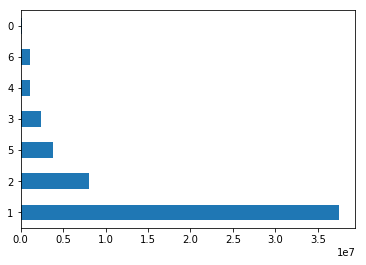

In [8]:
filter_train_df.passenger_count.value_counts().plot(kind='barh')

In [2]:
from math import sin, cos, sqrt, atan2, radians

def earth_distance(start_longitude, start_latitude, stop_longitude, stop_latitude):
    R = 6373.0
    lat1 = radians(start_latitude)
    lon1 = radians(start_longitude)
    lat2 = radians(stop_latitude)
    lon2 = radians(stop_longitude)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [9]:
earth_distance(-73.950263,40.755101,-73.940435,40.750783)

0.9573098546554233

In [5]:
from datetime import datetime
from multiprocessing import Process

def calculate_distance(i, df):
    with open('data/output_{}'.format(i), 'w') as f:
        count = 0
        distances = []
        for index, row in df.iterrows():
            distance = earth_distance(row['pickup_longitude'], row['pickup_latitude'],
                                      row['dropoff_longitude'], row['dropoff_latitude'])
            distances.append('{}\n'.format(distance))
            count += 1
            if count % 100000 == 0:
                print('Worker {} {}: {}'.format(i, datetime.now(), count))
                f.writelines(distances)
                distances = []
        if distances:
            f.writelines(distances)

workers = []
batch_num = int(len(filter_train_df) / 24) + 1
for i in range(24):
    p = Process(target=calculate_distance, args=(i,filter_train_df[i*batch_num:(i+1)*batch_num]))
    p.start()
    workers.append(p)

for w in workers:
    w.join()

distances = []
for i in range(24):
    for line in open('data/output_{}'.format(i), 'r'):
        distances.append(float(line.strip()))
assert len(distances) == len(filter_train_df)
filter_train_df['distance'] = distances

Worker 2 2020-02-03 18:06:09.057605: 100000
Worker 4 2020-02-03 18:06:09.174902: 100000
Worker 8 2020-02-03 18:06:10.490975: 100000
Worker 12 2020-02-03 18:06:11.582107: 100000
Worker 6 2020-02-03 18:06:13.118100: 100000
Worker 11 2020-02-03 18:06:15.763381: 100000
Worker 1 2020-02-03 18:06:16.717728: 100000
Worker 5 2020-02-03 18:06:17.268089: 100000
Worker 19 2020-02-03 18:06:17.654617: 100000
Worker 9 2020-02-03 18:06:18.200737: 100000
Worker 14 2020-02-03 18:06:18.201914: 100000
Worker 15 2020-02-03 18:06:18.549063: 100000
Worker 7 2020-02-03 18:06:18.903046: 100000
Worker 21 2020-02-03 18:06:18.923515: 100000
Worker 0 2020-02-03 18:06:19.931646: 100000
Worker 22 2020-02-03 18:06:21.464632: 100000
Worker 3 2020-02-03 18:06:22.323504: 100000
Worker 18 2020-02-03 18:06:26.223025: 100000
Worker 10 2020-02-03 18:06:26.717220: 100000
Worker 17 2020-02-03 18:06:27.512815: 100000
Worker 13 2020-02-03 18:06:27.874004: 100000
Worker 23 2020-02-03 18:06:31.186968: 100000
Worker 16 2020-02-03

Worker 20 2020-02-03 18:13:02.539564: 800000
Worker 17 2020-02-03 18:13:02.843721: 800000
Worker 9 2020-02-03 18:13:03.781364: 800000
Worker 8 2020-02-03 18:13:06.531278: 900000
Worker 16 2020-02-03 18:13:09.030540: 800000
Worker 3 2020-02-03 18:13:11.664808: 800000
Worker 10 2020-02-03 18:13:13.586462: 800000
Worker 18 2020-02-03 18:13:13.897610: 800000
Worker 23 2020-02-03 18:13:14.734930: 800000
Worker 2 2020-02-03 18:13:15.436869: 900000
Worker 0 2020-02-03 18:13:17.186739: 800000
Worker 12 2020-02-03 18:13:22.991138: 900000
Worker 4 2020-02-03 18:13:24.493466: 900000
Worker 1 2020-02-03 18:13:29.389125: 900000
Worker 21 2020-02-03 18:13:33.091818: 900000
Worker 6 2020-02-03 18:13:33.849536: 900000
Worker 15 2020-02-03 18:13:35.412612: 900000
Worker 19 2020-02-03 18:13:36.342536: 900000
Worker 14 2020-02-03 18:13:37.397598: 900000
Worker 7 2020-02-03 18:13:40.150183: 900000
Worker 22 2020-02-03 18:13:42.694373: 900000
Worker 5 2020-02-03 18:13:46.649931: 900000
Worker 11 2020-02-03

Worker 21 2020-02-03 18:19:58.654661: 1600000
Worker 6 2020-02-03 18:20:01.136787: 1600000
Worker 14 2020-02-03 18:20:02.987414: 1600000
Worker 1 2020-02-03 18:20:03.065976: 1600000
Worker 19 2020-02-03 18:20:03.487859: 1600000
Worker 15 2020-02-03 18:20:03.511538: 1600000
Worker 7 2020-02-03 18:20:05.812200: 1600000
Worker 22 2020-02-03 18:20:08.342746: 1600000
Worker 5 2020-02-03 18:20:16.044646: 1600000
Worker 11 2020-02-03 18:20:16.466278: 1700000
Worker 17 2020-02-03 18:20:22.696340: 1600000
Worker 8 2020-02-03 18:20:24.927204: 1700000
Worker 9 2020-02-03 18:20:25.718421: 1600000
Worker 20 2020-02-03 18:20:30.866847: 1600000
Worker 13 2020-02-03 18:20:31.115511: 1600000
Worker 16 2020-02-03 18:20:31.989110: 1600000
Worker 3 2020-02-03 18:20:34.582082: 1600000
Worker 2 2020-02-03 18:20:36.239166: 1700000
Worker 23 2020-02-03 18:20:37.092982: 1600000
Worker 18 2020-02-03 18:20:40.288663: 1600000
Worker 0 2020-02-03 18:20:41.643462: 1600000
Worker 10 2020-02-03 18:20:42.669764: 16000

In [3]:
from datetime import datetime

def get_date_feature(date_str, flag):
    date_value = datetime.strptime(date_str.strip(), '%Y-%m-%d %H:%M:%S UTC')
    if flag == 0:
        return date_value.hour
    elif flag == 1:
        return date_value.month
    else:
        return date_value.weekday()

In [7]:
filter_train_df['hour'] = filter_train_df['pickup_datetime'].apply(lambda x: int(x[11:13]))

In [8]:
filter_train_df['month'] = filter_train_df['pickup_datetime'].apply(lambda x: int(x[5:7]))

In [9]:
def calculate_weekday(i, df):
    with open('data/output_{}'.format(i), 'w') as f:
        count = 0
        weekdays = []
        for index, row in df.iterrows():
            weekdays.append('{}\n'.format(get_date_feature(row['pickup_datetime'], 2)))
            count += 1
            if count % 100000 == 0:
                print('Worker {} {}: {}'.format(i, datetime.now(), count))
                f.writelines(weekdays)
                weekdays = []
        if weekdays:
            f.writelines(weekdays)
            
workers = []
batch_num = int(len(filter_train_df) / 24) + 1
for i in range(24):
    p = Process(target=calculate_weekday, args=(i,filter_train_df[i*batch_num:(i+1)*batch_num]))
    p.start()
    workers.append(p)

for w in workers:
    w.join()

weekdays = []
for i in range(24):
    for line in open('data/output_{}'.format(i), 'r'):
        weekdays.append(int(line.strip()))
assert len(weekdays) == len(filter_train_df)
filter_train_df['weekday'] = weekdays

Worker 3 2020-02-03 18:58:43.646437: 100000
Worker 2 2020-02-03 18:58:43.887269: 100000
Worker 5 2020-02-03 18:58:44.336085: 100000
Worker 1 2020-02-03 18:58:44.409090: 100000
Worker 4 2020-02-03 18:58:44.534211: 100000
Worker 0 2020-02-03 18:58:44.593692: 100000
Worker 6 2020-02-03 18:58:45.506361: 100000
Worker 8 2020-02-03 18:58:46.697930: 100000
Worker 10 2020-02-03 18:58:47.084944: 100000
Worker 7 2020-02-03 18:58:47.461781: 100000
Worker 9 2020-02-03 18:58:48.542356: 100000
Worker 11 2020-02-03 18:58:49.786541: 100000
Worker 12 2020-02-03 18:58:50.246340: 100000
Worker 13 2020-02-03 18:58:50.534917: 100000
Worker 15 2020-02-03 18:58:50.658499: 100000
Worker 14 2020-02-03 18:58:50.722229: 100000
Worker 16 2020-02-03 18:58:51.397680: 100000
Worker 18 2020-02-03 18:58:51.939312: 100000
Worker 17 2020-02-03 18:58:52.187217: 100000
Worker 20 2020-02-03 18:58:52.571723: 100000
Worker 19 2020-02-03 18:58:53.334177: 100000
Worker 21 2020-02-03 18:58:53.594491: 100000
Worker 22 2020-02-03

Worker 10 2020-02-03 19:04:29.641209: 800000
Worker 16 2020-02-03 19:04:29.837124: 800000
Worker 21 2020-02-03 19:04:30.787942: 800000
Worker 14 2020-02-03 19:04:30.813774: 800000
Worker 22 2020-02-03 19:04:32.019671: 800000
Worker 19 2020-02-03 19:04:34.461799: 800000
Worker 12 2020-02-03 19:04:34.991704: 800000
Worker 23 2020-02-03 19:04:37.934281: 800000
Worker 1 2020-02-03 19:05:04.174291: 900000
Worker 2 2020-02-03 19:05:05.771991: 900000
Worker 7 2020-02-03 19:05:06.324444: 900000
Worker 4 2020-02-03 19:05:09.128960: 900000
Worker 6 2020-02-03 19:05:10.417334: 900000
Worker 5 2020-02-03 19:05:12.779605: 900000
Worker 3 2020-02-03 19:05:13.281004: 900000
Worker 8 2020-02-03 19:05:13.333563: 900000
Worker 9 2020-02-03 19:05:14.756287: 900000
Worker 11 2020-02-03 19:05:15.117140: 900000
Worker 0 2020-02-03 19:05:15.774408: 900000
Worker 15 2020-02-03 19:05:15.975090: 900000
Worker 20 2020-02-03 19:05:16.287507: 900000
Worker 18 2020-02-03 19:05:16.699638: 900000
Worker 13 2020-02-03

Worker 8 2020-02-03 19:10:50.825401: 1600000
Worker 9 2020-02-03 19:10:51.771430: 1600000
Worker 20 2020-02-03 19:10:51.903423: 1600000
Worker 5 2020-02-03 19:10:51.991344: 1600000
Worker 18 2020-02-03 19:10:52.715312: 1600000
Worker 17 2020-02-03 19:10:53.067090: 1600000
Worker 11 2020-02-03 19:10:53.292456: 1600000
Worker 3 2020-02-03 19:10:53.541765: 1600000
Worker 15 2020-02-03 19:10:53.770774: 1600000
Worker 13 2020-02-03 19:10:54.079154: 1600000
Worker 21 2020-02-03 19:10:55.041973: 1600000
Worker 22 2020-02-03 19:10:55.430759: 1600000
Worker 16 2020-02-03 19:10:55.539185: 1600000
Worker 0 2020-02-03 19:10:57.323492: 1600000
Worker 14 2020-02-03 19:10:58.574804: 1600000
Worker 10 2020-02-03 19:11:00.080648: 1600000
Worker 19 2020-02-03 19:11:03.413984: 1600000
Worker 12 2020-02-03 19:11:07.153774: 1600000
Worker 23 2020-02-03 19:11:08.406753: 1600000
Worker 1 2020-02-03 19:11:23.155656: 1700000
Worker 7 2020-02-03 19:11:26.078059: 1700000
Worker 2 2020-02-03 19:11:28.409715: 1700

In [10]:
filter_train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,month,weekday
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.031088,17,6,0.0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.452786,16,1,1.0
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389961,0,8,3.0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.800149,4,4,5.0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999784,7,3,1.0


In [20]:
from functools import partial

filter_train_df['hour'] = filter_train_df['pickup_datetime'].apply(partial(get_date_feature, flag=0))
filter_train_df['month'] = filter_train_df['pickup_datetime'].apply(partial(get_date_feature, flag=1))
filter_train_df['weekday'] = filter_train_df['pickup_datetime'].apply(partial(get_date_feature, flag=2))

KeyboardInterrupt: 

In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
tmp_df = pd.DataFrame(
    {
        'hour': list(range(24)), 
        'month': list(range(1, 13)) + [1]*12,
        'weekday': list(range(7)) + [0]*17
    }
)
# enc.fit(filter_train_df[['hour', 'month', 'weekday']])
enc.fit(tmp_df[['hour', 'month', 'weekday']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [14]:
onehot_df = enc.transform(filter_train_df[['hour', 'month', 'weekday']]).toarray()
for i,column in enumerate(enc.get_feature_names(['hour', 'month', 'weekday']).tolist()):
    filter_train_df[column] = onehot_df[:,i]

In [15]:
filter_train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,...,month_10,month_11,month_12,weekday_0.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.031088,17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.452786,16,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389961,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.800149,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999784,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
for column in ['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
               'hour', 'month', 'weekday']:
    filter_train_df.pop(column)
filter_train_df.head()

,fare_amount,passenger_count,distance,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,...,month_10,month_11,month_12,weekday_0.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0
0,4.5,1,1.031088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.9,1,8.452786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5.7,2,1.389961,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7.7,1,2.800149,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.3,1,1.999784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
train, val = train_test_split(filter_train_df, test_size=0.002)
y_train = train.pop('fare_amount')
X_train = train
y_val = val.pop('fare_amount')
X_val = val
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test_df), 'test examples')

MemoryError: Unable to allocate 18.2 GiB for an array with shape (45, 54268998) and data type float64

In [19]:
y_train = filter_train_df.pop('fare_amount')
X_train = filter_train_df

Text(0.5, 1.0, 'Distribution of fare amount')

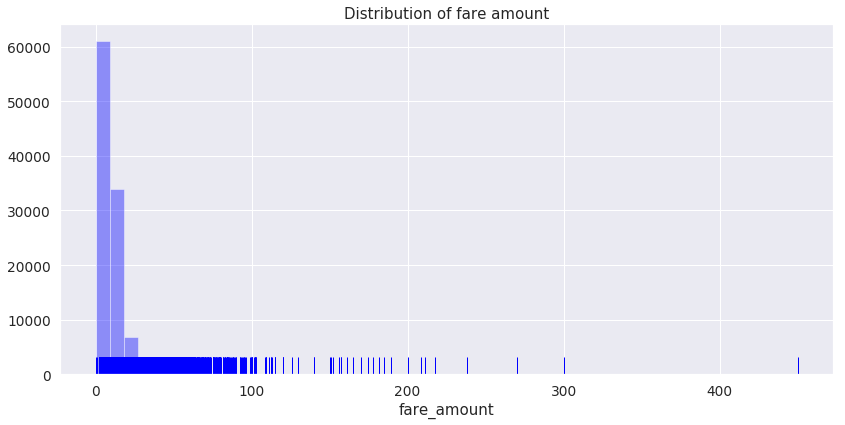

In [64]:
plt.figure(figsize=(12,6))
sns.distplot(val['fare_amount'] ,kde= False, bins=50 , rug = True ,color='blue')
plt.tight_layout()
plt.title('Distribution of fare amount')

In [ ]:
corr = val.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, linecolor="white", lw =1, annot=True)

In [ ]:
fare_amount_corr = val.corr()["fare_amount"]
fare_amount_corr_sort = fare_amount_corr.sort_values(axis=0 , ascending=False)
fare_amount_corr_sort

In [3]:
X_train = pd.read_csv('X_train.csv')
X_train.pop('index')
y_train = pd.read_csv('y_train.csv')

In [8]:
X_train.head()

,passenger_count,distance,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,...,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,1.031088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,8.452786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1.389961,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,2.800149,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1.999784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0, batch_size='auto', 
                       learning_rate='invscaling', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=False, 
                       early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999)
mlp_reg.fit(X_train, y_train)

/opt/rh/rh-python35/root/usr/lib64/python3.5/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='invscaling',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=False, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [10]:
from sklearn.externals import joblib

joblib.dump(mlp_reg, 'mlp_model.pkl')

/opt/rh/rh-python35/root/usr/lib64/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['mlp_model.pkl']

In [2]:
from sklearn.externals import joblib

mlp_reg = joblib.load('mlp_model.pkl')

/opt/rh/rh-python35/root/usr/lib64/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [11]:
from functools import partial

test_df = pd.read_csv('test.csv')

distances = []
for index, row in test_df.iterrows():
    distance = earth_distance(row['pickup_longitude'], row['pickup_latitude'],
                              row['dropoff_longitude'], row['dropoff_latitude'])
    distances.append(distance)
test_df['distance'] = distances
test_df['hour'] = test_df['pickup_datetime'].apply(partial(get_date_feature, flag=0))
test_df['month'] = test_df['pickup_datetime'].apply(partial(get_date_feature, flag=1))
test_df['weekday'] = test_df['pickup_datetime'].apply(partial(get_date_feature, flag=2))
test_df.head(10)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,month,weekday
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2.323989,13,1,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2.426114,13,1,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.618822,11,10,5
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.961648,21,12,5
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,5.388992,21,12,5
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1,3.223561,21,12,5
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1,0.929893,12,10,3
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1,21.546864,12,10,3
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1,3.875178,12,10,3
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20 UTC,-73.969582,40.765519,-73.980686,40.770725,1,1.100139,15,2,1


In [12]:
onehot_df = enc.transform(test_df[['hour', 'month', 'weekday']]).toarray()
for i,column in enumerate(enc.get_feature_names(['hour', 'month', 'weekday']).tolist()):
    test_df[column] = onehot_df[:,i]
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,month,...,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2.323989,13,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2.426114,13,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.618822,11,10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.961648,21,12,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,5.388992,21,12,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
key = test_df.pop('key')
for column in ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
               'hour', 'month', 'weekday']:
    test_df.pop(column)
test_df.head()

,passenger_count,distance,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,...,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,2.323989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2.426114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.618822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1.961648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,5.388992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
test_predicted = mlp_reg.predict(test_df)
result = pd.DataFrame()
result['key'] = key
result['fare_amount'] = test_predicted
result.head(10)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.801182
1,2015-01-27 13:08:24.0000003,9.042051
2,2011-10-08 11:53:44.0000002,4.642165
3,2012-12-01 21:12:12.0000002,8.501197
4,2012-12-01 21:12:12.0000003,16.211159
5,2012-12-01 21:12:12.0000005,11.524674
6,2011-10-06 12:10:20.0000001,6.128732
7,2011-10-06 12:10:20.0000003,55.053267
8,2011-10-06 12:10:20.0000002,13.993808
9,2014-02-18 15:22:20.0000002,5.728221


In [18]:
result.to_csv('submission.csv')

In [4]:
mlp_reg.score(X_train[:10000000], y_train[:10000000])

0.759148096800349